In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
!pip install scikit-learn==0.24

     |████████████████████████████████| 22.3MB 199kB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [4]:
!pip install pmdarima==1.8.0

     |████████████████████████████████| 1.5MB 4.0MB/s 
     |████████████████████████████████| 9.5MB 36.8MB/s 
     |████████████████████████████████| 2.1MB 37.0MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: Cython 0.29.23
    Uninstalling Cython-0.29.23:
      Successfully uninstalled Cython-0.29.23


In [5]:
filename = "/content/gdrive/My Drive/BITS/4-2/ASM_sop/Rajasthan1/dataset.csv"
# The data of all the files from year 2000-2014 of AP have been combined and put into one file called Dataset
df = pd.read_csv(filename)
df=df.iloc[:,:17]
df

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Snow Depth
0,2000,1,1,0,0,0,0,0,0,0,0,-4,13.811437,982.749817,27.447862,174.755997,0
1,2000,1,1,1,0,0,0,0,0,0,0,-4,13.117300,982.670105,29.048857,169.544205,0
2,2000,1,1,2,0,0,0,0,0,0,0,-4,12.433960,982.404175,31.216659,156.340938,0
3,2000,1,1,3,0,0,0,0,0,0,0,-3,11.797632,982.555298,34.956075,142.945864,0
4,2000,1,1,4,0,0,0,0,0,0,0,-1,11.195487,982.558106,41.177540,129.625767,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131395,2014,12,31,19,0,0,0,0,0,0,0,-18,14.736618,985.312622,8.545349,109.345042,0
131396,2014,12,31,20,0,0,0,0,0,0,0,-18,13.804154,986.000549,8.901171,122.334315,0
131397,2014,12,31,21,0,0,0,0,0,0,0,-18,12.933973,986.018555,9.348792,135.562509,0
131398,2014,12,31,22,0,0,0,0,0,0,0,-18,12.142112,985.832092,9.821783,148.928152,0


In [6]:
df['Date']=df['Year'].astype(str) + df['Month'].astype(str).str.zfill(2) + df['Day'].astype(str).str.zfill(2) + df['Hour'].astype(str).str.zfill(2)+df['Minute'].astype(str)

df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d%H%M')
df.head(10)

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Snow Depth,Date
0,2000,1,1,0,0,0,0,0,0,0,0,-4,13.811437,982.749817,27.447862,174.755997,0,2000-01-01 00:00:00
1,2000,1,1,1,0,0,0,0,0,0,0,-4,13.117300,982.670105,29.048857,169.544205,0,2000-01-01 01:00:00
2,2000,1,1,2,0,0,0,0,0,0,0,-4,12.433960,982.404175,31.216659,156.340938,0,2000-01-01 02:00:00
3,2000,1,1,3,0,0,0,0,0,0,0,-3,11.797632,982.555298,34.956075,142.945864,0,2000-01-01 03:00:00
4,2000,1,1,4,0,0,0,0,0,0,0,-1,11.195487,982.558106,41.177540,129.625767,0,2000-01-01 04:00:00
5,2000,1,1,5,0,0,0,0,0,0,0,-11,11.136730,984.379272,19.563755,116.428208,0,2000-01-01 05:00:00
6,2000,1,1,6,0,0,0,0,0,0,0,-10,10.646979,985.168579,21.357848,103.583783,0,2000-01-01 06:00:00
7,2000,1,1,7,0,0,0,0,0,0,0,-9,11.265209,985.925598,22.168916,91.181648,0,2000-01-01 07:00:00
8,2000,1,1,8,0,78,306,135,74,354,139,-8,14.277325,986.486450,20.120814,79.450627,0,2000-01-01 08:00:00
9,2000,1,1,9,0,114,597,331,121,600,339,-6,17.677278,986.856323,18.365240,68.755938,0,2000-01-01 09:00:00


In [7]:
X=df[['Date','GHI']]
X.set_index('Date',inplace=True)
print(X.shape)

(131400, 1)


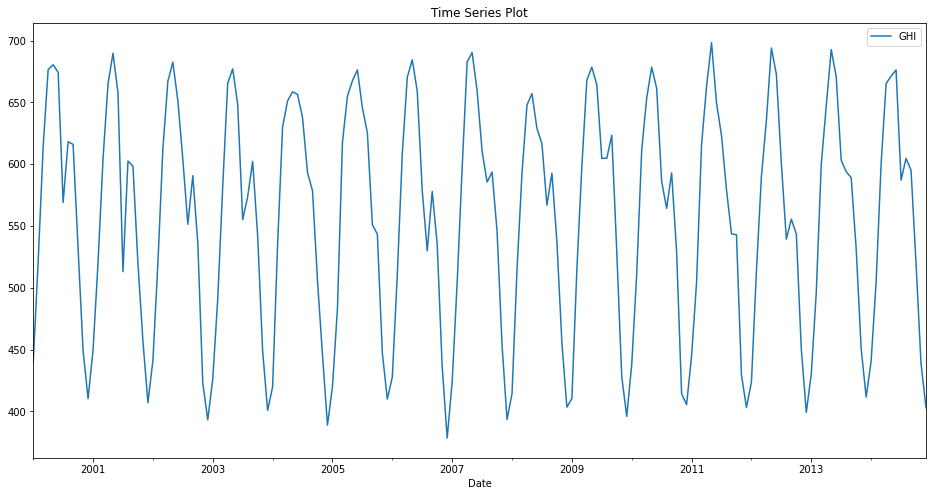

In [8]:
#y=X['GHI']
X=X.between_time('08:00','17:00',include_start=True,include_end=True)
X=X.reset_index()
y=X.resample('M',on='Date').mean()
y=y.dropna()
#y=np.log(y+1)
del X
del df
y.plot(figsize=[16,8],title='Time Series Plot')

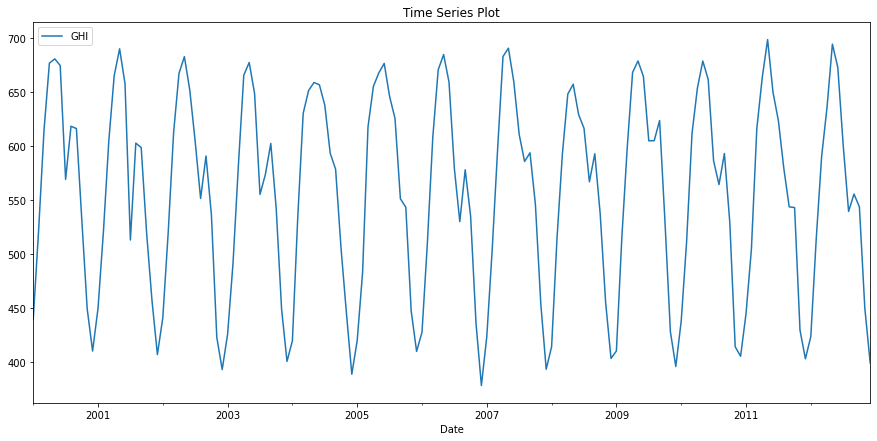

In [9]:
y[:'2012'].plot(figsize=[15,7],title='Time Series Plot')

In [10]:
X_train=y[:'2011']
X_test=y['2012':]

In [11]:
np.any(np.isnan(X_test))

False

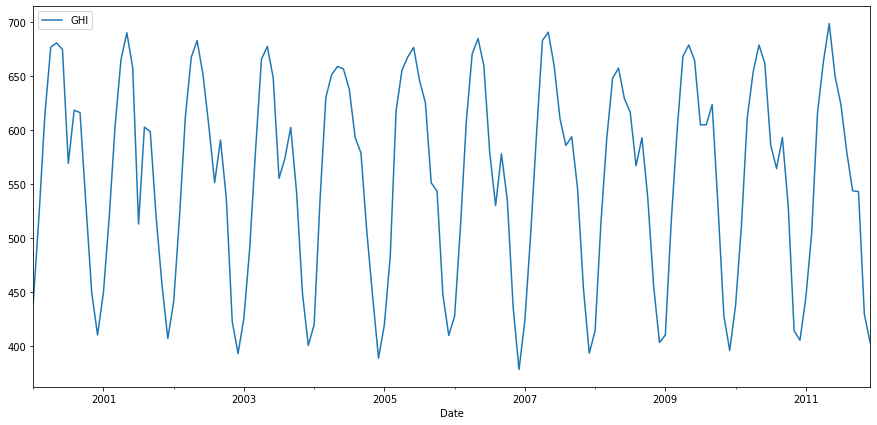

In [12]:
X_train.plot(figsize=(15,7))

In [13]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(X_train, start_p=0, start_q=0,max_p=1,max_d=1,max_q=1, d=1, m=12,trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)
stepwise_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1380.127, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1586.776, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1503.930, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1584.779, Time=0.01 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1513.392, Time=0.18 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1417.590, Time=0.20 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.75 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=1382.066, Time=0.88 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=1471.968, Time=0.46 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=2.23 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1366.533, Time=0.57 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1502.761, Time=0.36 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -653.552
Date:                            Wed, 26 May 2021   AIC                           1319.103
Time:                                    15:18:29   BIC                           1336.880
Sample:                                         0   HQIC                          1326.327
                                            - 144                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -2.235e-05      0.002     -0.015      0.988      -0.003       0.003
ar.L1          0.1862      0.028      6.601      0.000       0.131       0.241
ma.L1         -0.9819      0.094    -10.500      0.000      -1.165      -0.799
ar.S.L12       0.9982      0.002    527.154      0.000       0.994       1.002
ma.S.L12      -0.7690      0.077     -9.946      0.000      -0.920      -0.617
sigma2       403.4620     43.251      9.328      0.000     318.692     488.232
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                39.02
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                             0.13
Prob(H) (two-sided):                  0.30   Kurtosis:                         5.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
stepwise_model.fit(X_train)
#print(stepwise_model.summary())

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True)

In [15]:
X_test.shape

(36, 1)

In [16]:
pred=stepwise_model.predict(n_periods=36)

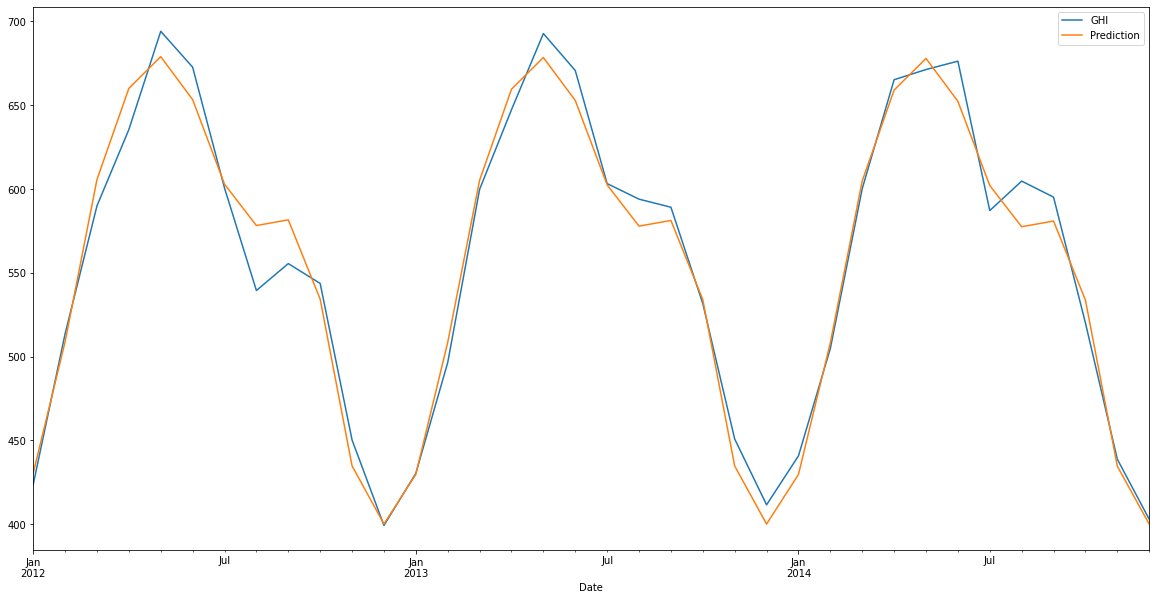

In [17]:
pred = pd.DataFrame(pred,index = X_test.index,columns=['Prediction'])
pd.concat([X_test,pred],axis=1).plot(figsize=(20,10))

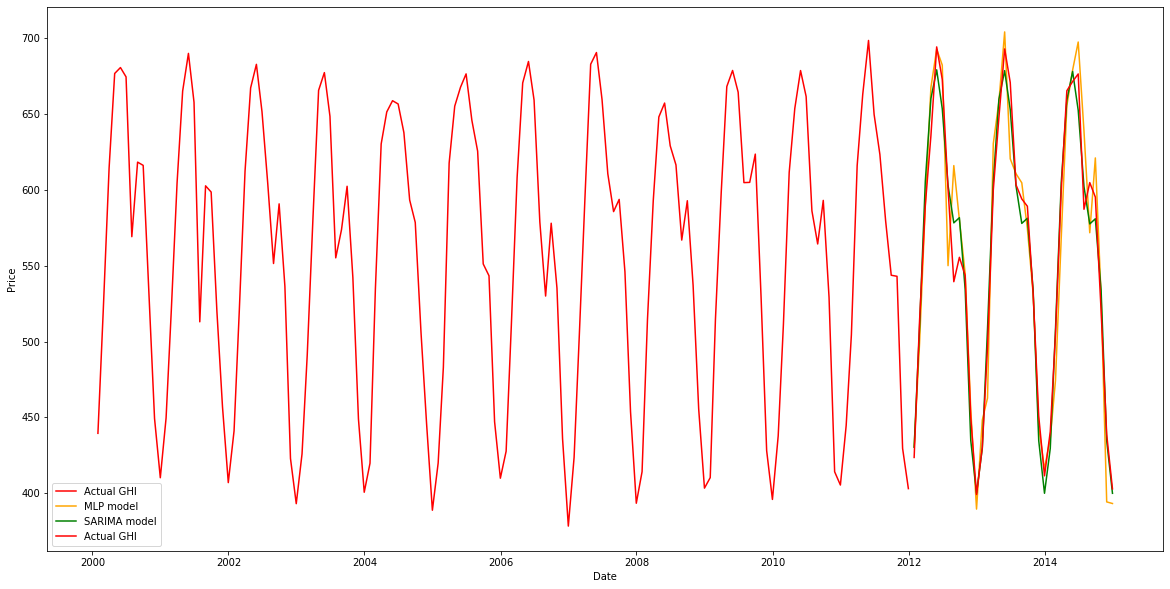

In [23]:
df1 = pd.read_csv('/content/gdrive/My Drive/BITS/4-2/ASM_sop/Code/Rajasthan1/MLP_monthly.csv')
df2 = pd.read_csv('/content/gdrive/My Drive/BITS/4-2/ASM_sop/Code/Rajasthan1/LSTM_monthly.csv')
plt.figure(figsize = (20,10))
plt.plot(X_train.index,X_train, color= 'red', label= 'Actual GHI')
plt.plot(X_test.index,df1['GHI'],color='orange',label='MLP model')
#plt.plot(df1['Date'],df2['GHI'], color= 'blue', label= 'LSTM model')
plt.plot(X_test.index,pred , color= 'green', label= 'SARIMA model') 
plt.plot(X_test.index,X_test , color= 'red', label= 'Actual GHI') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [25]:
Fdates= pd.date_range('2012-01-01','2022-01-01' , freq='1M')
Fdates

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31',
               ...
               '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30',
               '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31',
               '2021-11-30', '2021-12-31'],
              dtype='datetime64[ns]', length=120, freq='M')

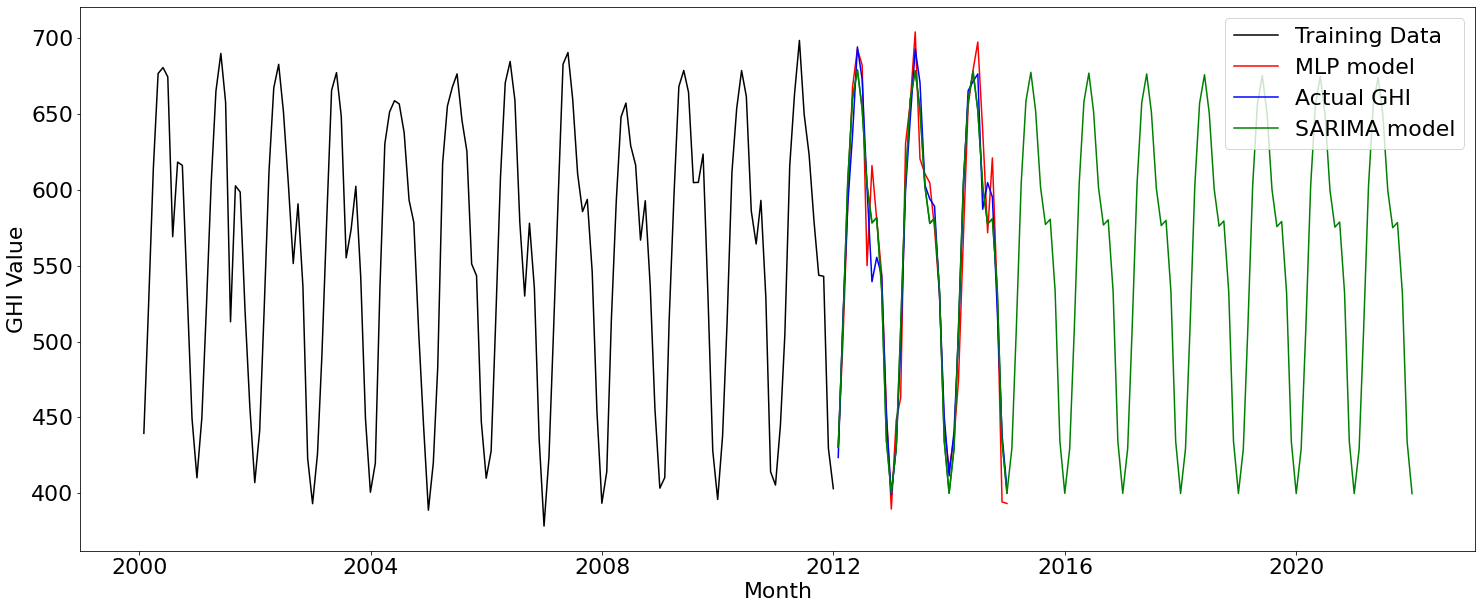

In [35]:
plt.rcParams.update({'font.size': 22})
pred1=stepwise_model.predict(n_periods=120)
plt.figure(figsize = (25,10))


plt.plot(X_train.index,X_train, color= 'black', label= 'Training Data')

plt.plot(X_test.index,df1['GHI'],color='red',label='MLP model')
#plt.plot(df1['Date'],df2['GHI'], color= 'blue', label= 'LSTM model')
plt.plot(X_test.index,pred , color= 'green') 
plt.plot(X_test.index,X_test , color= 'blue', label= 'Actual GHI') 
plt.plot(Fdates,pred1 , color= 'green', label= 'SARIMA model') 
plt.xlabel('Month')
plt.ylabel('GHI Value')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(X_test,pred)

0.021096050127099347

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X_test, pred, squared=False)

14.713327305523837